# Convolutional Network

In [1]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), ".."))

In [2]:
from pyldl.activations import ReLU
from pyldl.encapsulations import Sequential
from pyldl.losses import CrossEntropyLoss
from pyldl.modules import Conv1D, Flatten, Linear, MaxPool1D
from pyldl.optimizers import SGD
from pyldl.utils import load_usps, encode_one_hot, contingency_matrix

In [3]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

## Convolutional Modules

We first tested the convolutional-related modules and compared them to already existing libraries. We saw that it worked fine overall.

In [4]:
X = np.array([
    [[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4], [5, 5, 5]],
    [[6, 6, 6], [7, 7, 7], [8, 8, 8], [9, 9, 9], [10, 10, 10]],
    [[11, 11, 11], [12, 12, 12], [13, 13, 13], [14, 14, 14], [15, 15, 15]],
    [[16, 16, 16], [17, 17, 17], [18, 18, 18], [19, 19, 19], [20, 20, 20]],
])

conv_module = Conv1D(3, 3, 2, 2)

output = conv_module.forward(X)
print("Convolution: ", output)
print("Output shape: ", output.shape)

delta = 5*np.ones_like(output)
backward_delta_output = conv_module.backward_delta(X, delta)
print("\nDelta backward pass: ", backward_delta_output)
print("Delta original shape: ", delta.shape)
print("Output delta shape: ", backward_delta_output.shape)

Convolution:  [[[-0.64983793  1.1521857 ]
  [-0.50320955  3.22236573]]

 [[-0.28326697  6.32763577]
  [-0.13663859  8.3978158 ]]

 [[ 0.08330398 11.50308584]
  [ 0.22993237 13.57326586]]

 [[ 0.44987494 16.67853591]
  [ 0.59650332 18.74871593]]]
Output shape:  (4, 2, 2)

Delta backward pass:  [[[ 3  0  2]
  [ 4 -4  0]
  [ 5 -1  0]
  [ 4 -4  0]
  [ 2 -1 -2]]

 [[ 3  0  2]
  [ 4 -4  0]
  [ 5 -1  0]
  [ 4 -4  0]
  [ 2 -1 -2]]

 [[ 3  0  2]
  [ 4 -4  0]
  [ 5 -1  0]
  [ 4 -4  0]
  [ 2 -1 -2]]

 [[ 3  0  2]
  [ 4 -4  0]
  [ 5 -1  0]
  [ 4 -4  0]
  [ 2 -1 -2]]]
Delta original shape:  (4, 2, 2)
Output delta shape:  (4, 5, 3)


In [5]:
X = np.array([
    [
        [[1, 2], [3, 4]],
        [[5, 6], [7, 8]],
        [[9, 10], [11, 12]],
    ],
    [
        [[1, 2], [3, 4]],
        [[5, 6], [7, 8]],
        [[9, 10], [11, 12]],
    ],
    [
        [[1, 2], [3, 4]],
        [[5, 6], [7, 8]],
        [[9, 10], [11, 12]],
    ]
])

delta = np.ones_like(X)

flatten_module = Flatten()
output = flatten_module.forward(X)
print("Flattened input: ", output)
print("Output shape: ", output.shape)

backward_delta_output = flatten_module.backward_delta(X, delta)
print("\nDelta backward pass: ", backward_delta_output)
print("Delta original shape: ", delta.shape)
print("Output delta shape: ", backward_delta_output.shape)

Flattened input:  [[ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]]
Output shape:  (3, 12)

Delta backward pass:  [[[[1 1]
   [1 1]]

  [[1 1]
   [1 1]]

  [[1 1]
   [1 1]]]


 [[[1 1]
   [1 1]]

  [[1 1]
   [1 1]]

  [[1 1]
   [1 1]]]


 [[[1 1]
   [1 1]]

  [[1 1]
   [1 1]]

  [[1 1]
   [1 1]]]]
Delta original shape:  (3, 3, 2, 2)
Output delta shape:  (3, 3, 2, 2)


In [6]:
X = np.array([
    [[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4], [5, 5, 5]],
    [[6, 6, 6], [7, 7, 7], [8, 8, 8], [9, 9, 9], [10, 10, 10]],
    [[11, 11, 11], [12, 12, 12], [13, 13, 13], [14, 14, 14], [15, 15, 15]],
    [[16, 16, 16], [17, 17, 17], [18, 18, 18], [19, 19, 19], [20, 20, 20]],
])

pool_module = MaxPool1D(3, 2)
output = pool_module.forward(X)
print("Pooled input: ", output)
print("Output shape: ", output.shape)

delta = np.array([
    [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]],
    [[16, 17, 18], [19, 20, 21], [22, 23, 24], [25, 26, 27], [28, 29, 30]],
    [[31, 32, 33], [34, 35, 36], [37, 38, 39], [40, 41, 42], [43, 44, 45]],
    [[46, 47, 48], [49, 50, 51], [52, 53, 54], [55, 56, 57], [58, 59, 60]]
])
backward_delta_output = pool_module.backward_delta(X, delta)
print("\nDelta backward pass: ", backward_delta_output)
print("Delta original shape: ", delta.shape)
print("Output delta shape: ", backward_delta_output.shape)

Pooled input:  [[[ 3  3  3]
  [ 5  5  5]]

 [[ 8  8  8]
  [10 10 10]]

 [[13 13 13]
  [15 15 15]]

 [[18 18 18]
  [20 20 20]]]
Output shape:  (4, 2, 3)

Delta backward pass:  [[[ 0  0  0]
  [ 0  0  0]
  [ 7  8  9]
  [ 0  0  0]
  [ 7  8  9]]

 [[ 0  0  0]
  [ 0  0  0]
  [22 23 24]
  [ 0  0  0]
  [22 23 24]]

 [[ 0  0  0]
  [ 0  0  0]
  [37 38 39]
  [ 0  0  0]
  [37 38 39]]

 [[ 0  0  0]
  [ 0  0  0]
  [52 53 54]
  [ 0  0  0]
  [52 53 54]]]
Delta original shape:  (4, 5, 3)
Output delta shape:  (4, 5, 3)


## Dataset and Network

We consider a multi-class classification problem with digit images. In order to stabilize our networks performances, we normalize the images.

In [7]:
np.random.seed(0)

In [8]:
# X, y = load_usps("../data/USPS_data.txt")
# y = y.reshape(-1, 1)

X_train, y_train = load_usps("../data/USPS_train.txt")
X_test, y_test = load_usps("../data/USPS_test.txt")

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

y_train = encode_one_hot(y_train)
print(y_train.shape)

# Min-Max Scaling
x_train_min = X_train.min()
x_train_max = X_train.max()
X_train = (X_train - x_train_min) / (x_train_max - x_train_min)
X_train = X_train[:, :, np.newaxis]

x_test_min = X_test.min()
x_test_max = X_test.max()
X_test = (X_test - x_test_min) / (x_test_max - x_test_min)
X_test = X_test[:, :, np.newaxis]

print(X_train.shape)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(7291, 256) (7291,)
(2007, 256) (2007,)
(7291, 10)
(7291, 256, 1)


In [9]:
network = Sequential(Conv1D(3,1,32,1), MaxPool1D(2,2), Flatten(), Linear(4064,100), ReLU(), Linear(100,10))
loss = CrossEntropyLoss()

## Training the convolutional network

In [10]:
losses = SGD(network, loss, X_train, y_train, batch_size=32, gradient_step=1e-4, n_iter=50)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [03:28<00:00,  4.17s/it]


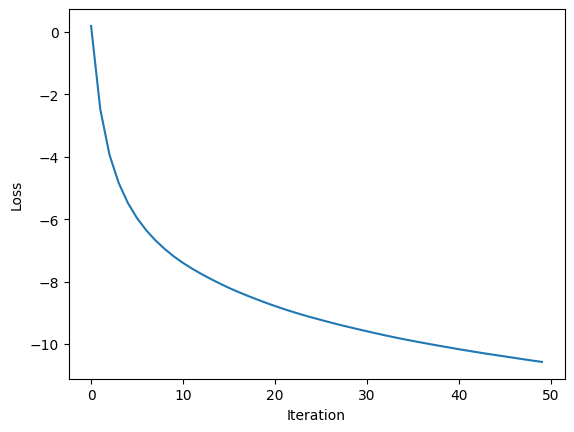

In [11]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

The loss is slowly converging over the 50 iterations. We didn't run over more iterations because it consumes a lot of time to train the network.

In [12]:
def predict(X):
    return network(X).argmax(axis=1)

def accuracy(y, yhat):
    return (y == yhat).mean()

yhat = predict(X_test)
print(f"Accuracy: {accuracy(y_test, yhat)*100:.2f}%")

Accuracy: 92.68%


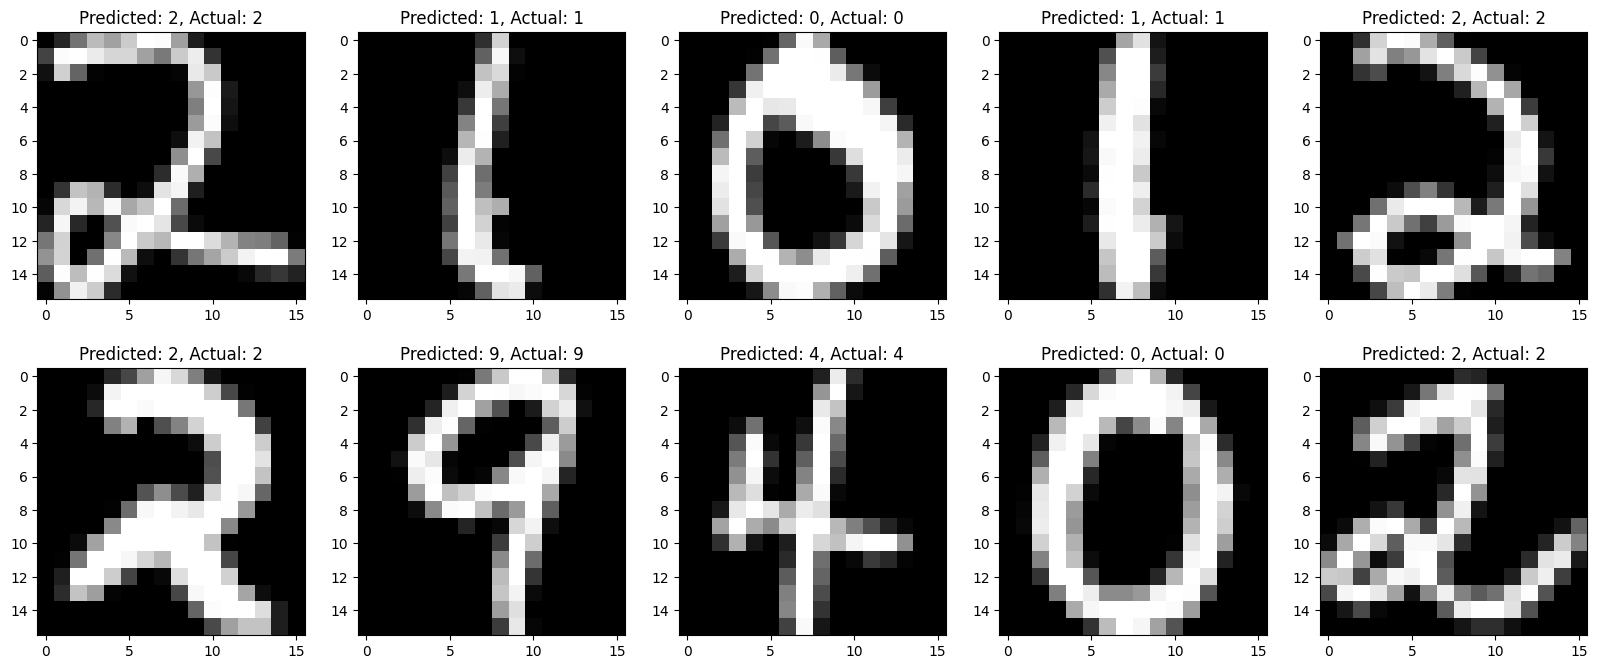

In [13]:
n_images = 10

random_indexes = np.random.choice(range(len(y_test)), n_images, replace=False)
images = X_test[random_indexes]
true_labels = y_test[random_indexes]
predicted_labels = yhat[random_indexes]

plt.subplots(2, 5, figsize=(20, 8))
for i in range(n_images):
    plt.subplot(2, 5, i+1)
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {true_labels[i]}")
    plt.imshow(images[i].reshape(16,16), cmap='gray')

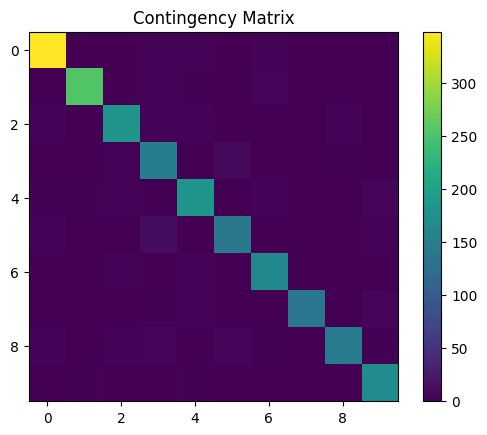

In [14]:
m = contingency_matrix(y_test, yhat)

fig = plt.figure()
mat_plot = plt.imshow(m)
plt.title("Contingency Matrix")
plt.colorbar(mat_plot)

plt.show()

The network recognizes the digits pretty well with an accuracy over 90%. The contingency matrix shows us that errors are due to similar-looking digits (e.g. 3 with 5). It performs well considering that the images are quite big (64x64) and it has only been trained on a few iterations.